# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

# Import dataset

In [2]:
apple_training_complete = pd.read_csv("../input/apple-stock-20132018/AAPL.xls")

In [3]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values
apple_training_processed

array([[ 79.117142],
       [ 78.26857 ],
       [ 76.709999],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

# Preprocess data

In [4]:
scaler = MinMaxScaler(feature_range = (0, 1))
apple_training_scaled = scaler.fit_transform(apple_training_processed)

apple_training_scaled.shape

(1259, 1)

In [5]:
features_set = []
labels = []

for i in range(60, apple_training_scaled.shape[0]):
    features_set.append(apple_training_scaled[i - 60:i, 0])
    labels.append(apple_training_scaled[i, 0])
    
features_set, labels = np.array(features_set), np.array(labels)
features_set.shape[1]

60

**LSTM layers work on 3D data with the following structure (nb_sequence, nb_timestep, nb_feature).

    nb_sequence corresponds to the total number of sequences in your dataset (or to the batch size if you are using mini-batch learning).
    nb_timestep corresponds to the size of your sequences.
    nb_feature corresponds to number of features describing each of your timesteps.


In [6]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(1199, 60, 1)

# Training model

In [7]:
model = Sequential()

model.add(LSTM(units=300, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 300)           362400    
_________________________________________________________________
dropout (Dropout)            (None, 60, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               8

In [9]:
model.fit(features_set, labels, epochs = 300, batch_size = 32)

Epoch 1/300
38/38 [==============================] - 7s 17ms/step - loss: 0.0395
Epoch 2/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 3/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0033
Epoch 4/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0033
Epoch 5/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0029
Epoch 6/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0029
Epoch 7/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0028
Epoch 8/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0026
Epoch 9/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0028
Epoch 10/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0029
Epoch 11/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0026
Epoch 12/300
38/38 [==============================] - 1s 16ms/step - loss: 0.0027
Epoch 13/300
38/38 [=====

# Import test dataset

In [10]:
apple_testing_complete = pd.read_csv("../input/apple-stock-20132018/AAPL - Jan2018.xls")
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [11]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values
test_inputs

array([154.179993, 154.970001, 155.809998, 156.059998, 155.970001,
       156.350006, 156.729996, 157.899994, 159.779999, 160.419998,
       156.75    , 156.610001, 156.889999, 156.289993, 156.910004,
       157.229996, 159.289993, 163.889999, 167.899994, 169.869995,
       166.600006, 174.      , 172.369995, 173.910004, 174.660004,
       175.110001, 175.110001, 173.5     , 173.039993, 169.970001,
       171.179993, 171.039993, 170.289993, 170.779999, 173.360001,
       175.100006, 175.050003, 174.300003, 172.630005, 170.429993,
       169.949997, 172.479996, 169.059998, 167.5     , 169.029999,
       170.490005, 169.199997, 172.149994, 172.5     , 172.399994,
       173.630005, 174.880005, 175.029999, 174.869995, 174.169998,
       174.679993, 170.800003, 170.100006, 171.      , 170.520004,
       170.160004, 172.529999, 172.539993, 173.440002, 174.350006,
       174.550003, 173.160004, 174.589996, 176.179993, 177.899994,
       176.149994, 179.369995, 178.610001, 177.300003, 177.300

In [12]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [13]:
test_features = []

for i in range(60, 80):
    test_features.append(test_inputs[i - 60:i, 0])

In [14]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [15]:
predictions = model.predict(test_features)

In [16]:
predictions = scaler.inverse_transform(predictions)

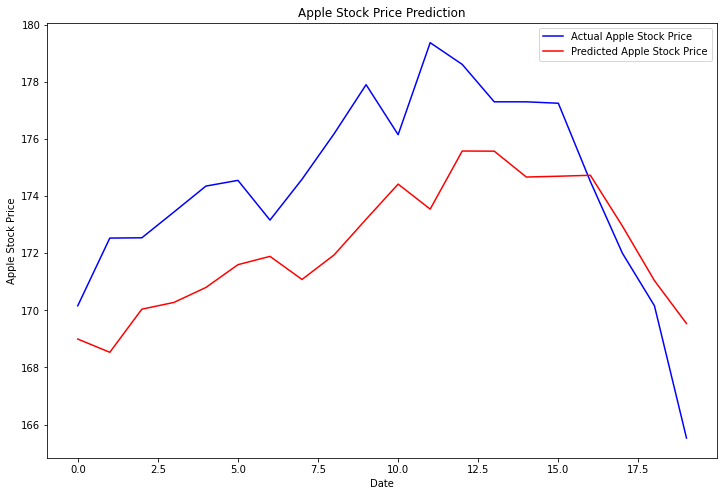

In [17]:
plt.figure(figsize=(12,8))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()